# Term Project_                                                                                 

##### 2020102496 이강민

# 지오코딩을 이용한 객체의 좌표 계산과  데이터 분석

### (1) 주제 선정 : 지오코딩을 이용한 데이터 생성 & 데이터 분석과 시각화

GIS를 통해 공간분석을 진행하기 위해, 객체의 공간정보를 파악하는 것은 매우 중요함. 이는 보통 객체의 위경도 좌표를 사용해 GIS 상에 투영하기 때문임. 공간분석 시 주로 오픈소스의 데이터 위주로 진행되는데, '정부 공공데이터 포털'이나 '서울시 열린 데이터 광장'에 게시된 데이터를 이용하다 보면 도로명 주소만 있거나, 위경도 좌표만 있는 사례가 빈번함. 이러한 데이터는 GIS상에 온전히 담아낼 수 없기 때문에 정보로서의 가치가 떨어짐.<br>
 <br>
 이때 사용할 수 있는 방법론이 지오코딩임. 지오코딩은 객체의 도로명주소(또는 구 주소)를 위경도 좌표로 변환해주는 것을 뜻함. 온라인에서 제공하는 지오코딩 툴은 biz-gis, Geocoder-Xr 등이 있음. 그러나 이러한 서비스들은 개별 IP당 일일 변환개수 제한(1일 10000건)이 있어 지오코딩 과정에서 데이터의 용량이 크거나 수정사항으로 번복할 때 제한사항이 있음.<br>
 <br>
 지오코딩을 Python으로 구현하면 일일 변환 제한 없이, 데이터를 무제한으로 변환할 수 있기 때문에 공간분석에서 유용하게 활용할 수 있음. 또한 공간분석에서 GIS가 용이한 이유는 중첩분석(Map 0verlay)인데, 이것을 python 내의 library를 이용하여 구현해보고자 함.

### (2) 가설 정의 :  Python을 이용한 지오코딩과 data 분석 & 시각화

1. 주소를(구 주소 또는 도로명 주소)를 가지는 객체는 python에서 지오코딩을 통하여 위경도 좌표를 계산할 수 있다. 또한 반대로 위경도를 가지는 객체를 대상으로 주소를 생성할 수 있다.
2. 1에서 언급된 방법을 하나의 객체가 아닌 CSV나 Excel 등 대용량으로 저장된 객체들에 대해서도 활용 가능하다. 
3. 1과 2에서 생성한 data를 기반으로 python library(ex. metplotlib, numpy, seaborn, plotly, folium)를 통하여 데이터 분석과 시각화가 가능하다. 특히 공간분석에서 핵심적인 역할을 자랑하는 GIS의 Map overaly(중첩 분석)이 가능하다.

### (3) 지오코딩을 위한 데이터 선택 : 원본

#### 아래의 데이터는 직접 다운로드 받는 방법으로 취득함
1. 서울시 동대문구 학원 교습소정보 csv 파일 (서울 열린데이터 광장) : for Geocoding<br>
( https://data.seoul.go.kr/dataList/OA-20535/S/1/datasetView.do )
2. 서울시 공공자전거 대여소 정보 csv 파일 (서울 열린데이터 광장) : for Map overlay<br>
( https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do )
3. 서울시 행정동 geojson 파일 : for 동대문구 행정동 geojson <br> 
( https://github.com/vuski/admdongkor )


### (4) 지오코딩을 위한 데이터 가공
<br>(자세한 과정은 분석과정에 포함되어 있음. 코드 실행 순서에 의해 오류가 날 수도 있기에 (5)의 분석 과정을 따라가며 코드를 실행하기를 권장함)

#### (4)-1지오코딩에 사용할 csv 파일에서 pandas를 이용해 칼럼별로 필요한 데이터를 추출함

In [49]:
# csv 파일을 읽기 위해 pandas를 import 해줌.
import pandas as pd

# 전처리 전의 data이므로, raw라는 이름으로 csv 파일을 read함.
Dongdaemun_raw = pd.read_csv('.\\data\\서울시 동대문구 학원 교습소정보.csv', encoding='cp949')

# 서울시 동대문구 학원 교습소정보_Raw.csv에서 필요한 칼럼만 추출하여 저장
# 지오코딩을 위해 도로명 주소만 따로 추출함.
# Name: 도로명주소, Length: 672, dtype: object, data의 총 개수는 672개 라는 것을 알 수 있음. 
# 이 672개의 도로명주소를 지오코딩하여, '위도', '경도' 라는 칼럼을 추가해 위경도 좌표를 추가할 것임.

Dongdaemun_data = Dongdaemun_raw[['행정구역명', '학원명', '도로명주소', '도로명상세주소', '분야명']]
print(Dongdaemun_data)


    행정구역명         학원명                 도로명주소  \
0    동대문구      한국이용학원  서울특별시 동대문구 왕산로33길 32   
1    동대문구    대성회계실무학원    서울특별시 동대문구 왕산로 225   
2    동대문구    국제전자과학학원  서울특별시 동대문구 고산자로36길 3   
3    동대문구  조이앤플레이음악학원     서울특별시 동대문구 이문로 38   
4    동대문구   한독자동차정비학원     서울특별시 동대문구 왕산로 31   
..    ...         ...                   ...   
667  동대문구     래미안음악학원  서울특별시 동대문구 장한로28길 50   
668  동대문구        해냄학원     서울특별시 동대문구 황물로 42   
669  동대문구     이룸미술교습소  서울특별시 동대문구 장한로14길 81   
670  동대문구     휘경음악교습소    서울특별시 동대문구 한천로 250   
671  동대문구  이고은바이올린교습소    서울특별시 동대문구 무학로 202   

                                    도로명상세주소         분야명  
0                               , 2층  (제기동)        직업기술  
1    , 5층2호?5층6호?5층7호 중 일부(B호) (청량리동, 미주상가)       종합(대)  
2                       , 3층 일부 (제기동, 경동시장)        직업기술  
3                   , 3층 301호 (휘경동, 민족통일빌딩)       예능(대)  
4                             , 2층,3층 (신설동)        직업기술  
..                                      ...         ...  
667                          

여기서 지오코딩에 사용할 도로명주소를 추출하여 다른 변수로 지정함.

In [ ]:
Geocoding_address = Dongdaemun_raw['도로명주소']
print(Geocoding_address)

#### (4)-2 중첩 분석에 사용할 csv 파일에서 pandas를 이용해 칼럼별로 필요한 데이터를 추출함

In [16]:
raw_seoul_bike = pd.read_csv('.\\data\\공자전거 대여소 정보(23.06월 기준) (1).csv', encoding = 'cp949')
# 인코딩을 cp949로 변경해줘야함. 설정하지 않으면 한글이 깨짐.
# 필요한 컬럼 정보만 가져옴

# 데이터 전처리를 실시해줌. 한번에 여러 행을 제거해야 하기 때문에 drop 메소드의 parameter에 리스트로  삭제하고자 하는 행을 넣음.
new_seoul_bike = raw_seoul_bike.drop([0, 1, 2, 3]) 

# 의미가 없는 데이터는 칼럼(열)을 지워, 데이터 전처리를 진행함. axis = 1은 '행'이 아니라 '열(칼럼)'을 대상으로 삼기 위해 추가하는 코드임.
# axis = 0 이 default 값임. 이는 '행'을 나타냄.
new_seoul_bike = new_seoul_bike.drop(['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1)
# 칼럼명을 새롭게 지정함.
new_seoul_bike.rename(columns = {'Unnamed: 3':'도로명주소','Unnamed: 4':'위도', 'Unnamed: 5': '경도', 'Unnamed: 8': '설치형태2'}, inplace=True)
new_seoul_bike

대여소\n번호            보관소(대여소)명 소재지(위치)                            도로명주소  \
4       301.0          경복궁역 7번출구 앞     종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞   
5       302.0          경복궁역 4번출구 뒤     종로구  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤   
6       303.0          광화문역 1번출구 앞     종로구       서울특별시 종로구 세종대로 지하189 세종로공원   
7       305.0               종로구청 옆     종로구               서울특별시 종로구 세종로 84-1   
8       307.0            서울역사박물관 앞     종로구      서울특별시 종로구 새문안로 55 서울역사박물관 앞   
...       ...                  ...     ...                              ...   
2748   3699.0              상일파출소 옆     강동구                    강동구 상일동 520-1   
2749   3700.0      강변그대가리버뷰 입구 맞은편     강동구                    강동구 천호동 250-7   
2750   3701.0                방아삼거리     강동구                    강동구 둔촌동 118-2   
2751   4951.0   강동농협 버스정류소 앞(광채빌라)     강동구                   강동구 암사동 488-21   
2752   4952.0         천호시장 버스정류소 옆     강동구                  강동구 천호동 397-465   

               위도           경도      설치\n시기 설치형태 설치형태2 운영\n방식  
4     37.57579422  126.9714508  2015-10-07   20    20     QR  
5     37.57594681  126.9740601  2015-10-07   12    12     QR  
6     37.57176971  126.9746628  2015-10-07    8     8     QR  
7     37.57255936  126.9783325  2015-01-07   16    16     QR  
8     37.56999969  126.9710999  2015-10-07   11    11     QR  
...           ...          ...         ...  ...   ...    ...  
2748  37.55655289  127.1658783  2022-06-21  NaN    15     QR  
2749  37.54816437  127.1225739  2022-07-08  NaN     8     QR  
2750   37.5232811  127.1461334  2022-10-12  NaN     8     QR  
2751    37.547966  127.1351624  2022-09-29  NaN     5     QR  
2752  37.54146576  127.1302567  2023-01-18  NaN     5     QR  

[2749 rows x 10 columns]

### (5) 분석 과정

#### 5-(1) 단일 객체에 대한 지오코딩

pyinstaller와 지오코딩 함수를 제공하는 geopy library를 설치함.

In [17]:
# #Pyinstaller를 설치함.
# pip install -U pyinstaller

# Python 라이브러리 중 geopy를 설치함. 
!pip install geopy

위의 코드를 실행할때, SyntaxError: invalid syntax 가 난다면 Anaconda(python)을 환경변수에 등록하는 절차(https://monand0603.tistory.com/30)를 시도함.


첫 번째로 단일 객체에 대한 지오코딩 함수를 정의한다.

In [18]:
from geopy.geocoders import Nominatim
# geopy.geocdoers의 모듈에서 Nominatiom method를 호출함.

geolocal = Nominatim(user_agent = 'South Korea', timeout=None)
# user_agent는 지오코딩을 실시하는 지역을 나타냄. 만약 지오코딩하는 지역이 South korea가 아니라면 다른 parameter를 사용해야 함.


def Geocoding_single(address):
    """ (string) -> (list)
    
    Geocoding 함수는 입력값으로 주소(도로명 또는 구 주소)를 받고 위경도 좌표를 반환하는 함수임
    Input parameter는 주소 string이며 지도 상에 표시된 완전한 주소를 전달해야 함.
    Output인 위경도는 list type임.
    주소를 변환하는 과정에서 잘못된 주소값을 전달할 수 있기 때문에 try, except 문법을 추가함.
    에러가 나더라도, 프로그램이 멈추지 않고 [0,0]의 return 값을 전달할 수 있도록 함. 이는 대용량의 데이터 변환에서 필수적인 요소임.
    >>> Geocoding_single("서울특별시 동대문구 경희대로 26 ")
     ['37.594986500000005' , '127.05490968993911']
    """
    try:
        geo = geolocal.geocode(address)
        crd = [geo.latitude, geo.longitude]
        return crd
    
    except:
        return [0,0]
    

이제 단일 객체에 대해서 주소를 입력 받고, 위경도를 계산하는 함수(Geocoding_single)을 정의하였으니, 정상적으로 돌아가는지 확인함. 

In [19]:
address2 = Geocoding_single("서울특별시 동대문구 경희대로 26") # 경희대학교 서울캠퍼스의 주소를 입력 parameter로 줌
print(address2) # 경희대학교 서울캠퍼스의 위경도를 list 형태로 return 하는 것을 볼 수 있음 [37.594986500000005, 127.05490968993911]

[37.594986500000005, 127.05490968993911]


동작 여부와 함께 실행 시간을 측정해줌. time과 datatime 모듈을 활용하면 소요시간을 정확하게 측정할 수 있음. start와 end 사이에 측정하고자 하는 함수를 삽입함. 이후 start와 end 사이의 시간차를 토대로 소요시간을 계산함.

In [20]:
import time
import datetime
# function이 실시되는 시간을 측정할 수 있는 libarary임.
# start time과 end time 사이에 측정하고자 하는 실행을 넣어 시간을 파악할 수 있음.

start = time.time()

address1 = Geocoding_single("경기도 용인시 기흥구 덕영대로 1732") # 경희대학교 국제캠퍼스의 주소를 입력 parameter로 줌
print(address1) # 경희대학교 국제캠퍼스의 위경도를 list 형태로 return 하는 것을 볼 수 있음 [37.2395581, 127.0834937]

end = time.time()

sec = (end - start)
result = datetime.timedelta(seconds=sec)
result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0])


[37.2395581, 127.0834937]
0:00:00


지오코딩은 대략 0.5초보다 적은 시간이 소요되는 것을 확인할 수 있음

#### 5-(2) 단일 객체에 대한 역지오코딩

In [21]:
from geopy.geocoders import Nominatim

geolocal = Nominatim(user_agent = 'South Korea', timeout=None)

def Geocoding_reverse_single(lat_lng_str): 
    """ (string) -> ('geopy.location.Location')
    
    Geocoding_reverse 함수는 입력값으로 위경도를 받고 주소를 반환하는 함수임
    이때 위경도는 하나의 string 이며 'lat , long' 형식으로 입력해야 함. 반환된 주소는 data type은 location임.
    이때 잘못된 위경도 값(user_agent에 해당하지 않는 위경도)을 전달할 수 있기 때문에 try, except 문법을 추가함.
    >>> Geocoding_reverse("37.2395581, 127.0834937")
    경희대학교 국제캠퍼스, 1732, 덕영대로, 하갈동, 기흥구, 용인시, 경기도, 17104, 대한민국
     
    """
    try:
        address = geolocal.reverse(lat_lng_str)
        return address
    except:
        return "404 not Found"


역지오코딩의 소요시간도 함께 측정해준다.

In [22]:
start = time.time()

address3 = Geocoding_reverse_single('37.2395581, 127.0834937')

end = time.time()


sec = (end - start)
result = datetime.timedelta(seconds=sec)
result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0])
# 역 지오코딩은 1초가 걸리지 않음
print(address3)

0:00:00
전자정보대학, 1732, 덕영대로, 하갈동, 기흥구, 용인시, 경기도, 17104, 대한민국


역 지오코딩 또한 0.5초 미만의 시간이 소요됨.

#### 5-(3) 대규모 data에 대한 지오코딩

In [23]:
# csv 파일을 읽기 위해 pandas를 import 해줌.
import pandas as pd

# 전처리 전의 data이므로, raw라는 이름으로 csv 파일을 read함.
Dongdaemun_raw = pd.read_csv('.\\data\\서울시 동대문구 학원 교습소정보.csv', encoding='cp949')

# 서울시 동대문구 학원 교습소정보_Raw.csv에서 필요한 칼럼만 추출하여 저장
# 지오코딩을 위해 도로명 주소만 따로 추출함.
# Name: 도로명주소, Length: 672, dtype: object, data의 총 개수는 672개 라는 것을 알 수 있음. 
# 이 672개의 도로명주소를 지오코딩하여, '위도', '경도' 라는 칼럼을 추가해 위경도 좌표를 추가할 것임.


여기서 지오코딩에 사용할 도로명주소를 추출하여 다른 변수로 지정함.

In [24]:
Geocoding_address = Dongdaemun_raw['도로명주소']
print(Geocoding_address)

0      서울특별시 동대문구 왕산로33길 32
1        서울특별시 동대문구 왕산로 225
2      서울특별시 동대문구 고산자로36길 3
3         서울특별시 동대문구 이문로 38
4         서울특별시 동대문구 왕산로 31
               ...         
667    서울특별시 동대문구 장한로28길 50
668       서울특별시 동대문구 황물로 42
669    서울특별시 동대문구 장한로14길 81
670      서울특별시 동대문구 한천로 250
671      서울특별시 동대문구 무학로 202
Name: 도로명주소, Length: 672, dtype: object


대용량 데이터를 대상으로 지오코딩을 실시하기 때문에 진행정도를 알 수 있는 tqdm 라이브러리를 설치함<br>(실행 결과 평균 10분 정도 소요됨.)

In [ ]:
# 대용량 데이터를 지오코딩 할 때 약간의 시간이 소요됨.
# 지오코딩이 어느정도 진행되었는지 시각적으로 표현할 수 있는 library임.
!pip install tqdm

In [ ]:
# 도로명주소를 기반으로 지오코딩 실시
lat = []
long = []
from tqdm import tqdm
for k in tqdm(Geocoding_address):
    lat.append(Geocoding_single(k)[0])
    long.append(Geocoding_single(k)[1])

지오코딩을 실시한 결과를 경도는 lat 리스트에, 위도는 long list에 하나씩 element로 append하고, 보기에 편리하도록 pandas dataFrame으로 모두 통합함.

In [ ]:
# lat은 위도, long은 경도이므로, 새로운 data에 필요한 칼럼들(위도, 경도 포함)을 모두 추가해서 따로 저장함.
Final_Dongdaemun_data = pd.DataFrame({'행정구역': Dongdaemun_raw['행정구역명'],
                                      '학원이름' : Dongdaemun_raw['학원명'],
                                      '주소':Geocoding_address,
                                      '상세주소':Dongdaemun_raw['도로명상세주소'],
                                      '위도':lat,'경도':long,'분야명':Dongdaemun_raw['분야명']})

In [ ]:
# 지오코딩의 결과를 삽입한 데이터를 확인한다. 
Final_Dongdaemun_data

Geocoding 과정에서 try-except 문법을 넣었음. 즉 에러가 발생해도 프로그램이 진행하도록 했기 때문에 데이터의 위도 또는 경도에 0이 있는 값을 찾아줌. 위도와 경도 중 하나라도 0인 인덱스를 구하고, 중복되는 인덱스를 제거하여 수정횟수를 줄이고자 함.

In [ ]:
# 위경도 좌표에서 오류가 있는 객체를 다시 한 번 지오코딩 실시
# 지오코딩 한 데이터 중 오류가 나서 위경도 좌표가 [0,0]으로 저장된 객체의 인덱스를 list로 만들어줌
lat_error = Final_Dongdaemun_data[Final_Dongdaemun_data['위도']==0]
long_error = Final_Dongdaemun_data[Final_Dongdaemun_data['경도']==0]

lat_error_index = list(lat_error.index)
long_error_index = list(long_error.index)

# 위도==0 or 경도 == 0 을 만족하는 index를 합침.
# 지오코딩은 위도, 경도를 동시에 만들어 내므로 프로그램 속도 향상을 위해 겹치는 인덱스를 제거

lat_error_index.extend(long_error_index)
print(lat_error_index)

Null_error = list(set(lat_error_index))
print(Null_error) #[65, 517]


In [ ]:
for k in Null_error :
    Final_Dongdaemun_data['위도'][k] = Geocoding_single(Final_Dongdaemun_data['주소'][k])[0]
    Final_Dongdaemun_data['경도'][k] = Geocoding_single(Final_Dongdaemun_data['주소'][k])[1]

다시 한 번 위도와 경도가 0인 데이터가 있는지 조사함.

In [ ]:
Final_Dongdaemun_data[Final_Dongdaemun_data['위도']==0]

In [ ]:
Final_Dongdaemun_data[Final_Dongdaemun_data['경도']==0]

'서울특별시 동대문구 보문로 6'는 python의 geopy library를 이용하면 에러가 발생해서 위경도 값이 나오지 않음. 따라서 이때는 Kakaomap Api를 이용하여 지오코딩을 실시하고, 위경도 값을 갱신함.<br/>

In [ ]:
# index 65, 517번째의 주소는 모두 '서울특별시 동대문구 보문로 6'임. 
Geocoding_single("서울특별시 동대문구 보문로 6")

geopy 라이브러리를 통해서 구할 수 없기에 카카오 map API를 활용해 위경도로 변환하고, 그 값을 갱신해줌

In [ ]:
import requests, json

def Kakao_Geocoding(address):
    
    # 주소를 string으로 받아서 위경도 좌표를 list로 반환함.
  url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
  # 'KaKaoAK ' 뒤에 개인키만 입력.
  # ex) KakaoAK 21ba322daf2d740f327e6b8316b81857
  headers = {"Authorization": "KakaoAK 21ba322daf2d740f327e6b8316b81857"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  coordinate = [str(address['y']), str(address['x'])]
  address_name = address['address_name']

  return coordinate

# kakaomap api를 이용하여 에러가 발생한 주소의 위경도 값을 추출함.
Add_lat_long = Kakao_Geocoding('서울특별시 동대문구 보문로 6')
print(Add_lat_long)

In [ ]:
# index 65, 517번째의 위도, 경도는 모두 0이고, 먼저 65 번째 data의 위경도를 수정해줌

Final_Dongdaemun_data.loc[65, '위도'] = Add_lat_long[0]
Final_Dongdaemun_data.loc[65, '경도'] = Add_lat_long[1]

# 517 번째 data의 위경도를 수정해줌

Final_Dongdaemun_data.loc[517, '위도'] = Add_lat_long[0]
Final_Dongdaemun_data.loc[517, '경도'] = Add_lat_long[1]

# 위도, 경도 값이 0인 객체가 없는 것을 확인함
print(Final_Dongdaemun_data[Final_Dongdaemun_data['위도']==0])
print(Final_Dongdaemun_data[Final_Dongdaemun_data['경도']==0])

In [ ]:
# Dataframe 작업물을 csv로 저장해줌.
Final_Dongdaemun_data.to_csv('Dongdaemun_educational_Institute.csv')

이후 최종 작업물을 csv 파일로 저장하고, 최종 작업물을 시각화함.

In [65]:
import pandas as pd
mapdata = pd.read_csv('.\\data\\Dongdaemun_Educational_Institute.csv')
mapdata

Unnamed: 0  행정구역        학원이름                    주소  \
0             0  동대문구      한국이용학원  서울특별시 동대문구 왕산로33길 32   
1             1  동대문구    대성회계실무학원    서울특별시 동대문구 왕산로 225   
2             2  동대문구    국제전자과학학원  서울특별시 동대문구 고산자로36길 3   
3             3  동대문구  조이앤플레이음악학원     서울특별시 동대문구 이문로 38   
4             4  동대문구   한독자동차정비학원     서울특별시 동대문구 왕산로 31   
..          ...   ...         ...                   ...   
667         667  동대문구     래미안음악학원  서울특별시 동대문구 장한로28길 50   
668         668  동대문구        해냄학원     서울특별시 동대문구 황물로 42   
669         669  동대문구     이룸미술교습소  서울특별시 동대문구 장한로14길 81   
670         670  동대문구     휘경음악교습소    서울특별시 동대문구 한천로 250   
671         671  동대문구  이고은바이올린교습소    서울특별시 동대문구 무학로 202   

                                       상세주소         위도          경도         분야명  
0                               , 2층  (제기동)  37.581312  127.041807        직업기술  
1    , 5층2호?5층6호?5층7호 중 일부(B호) (청량리동, 미주상가)  37.582044  127.047234       종합(대)  
2                       , 3층 일부 (제기동, 경동시장)  37.579179  127.039810        직업기술  
3                   , 3층 301호 (휘경동, 민족통일빌딩)  37.595178  127.059371       예능(대)  
4                             , 2층,3층 (신설동)  37.577413  127.029572        직업기술  
..                                      ...        ...         ...         ...  
667                                3층 (장안동)  37.572662  127.074779       예능(대)  
668                       , 2층 6호?7호 (답십리동)  37.571000  127.049662  입시.검정 및 보습  
669                , 302호일부 (장안동,래미안 장안아파트)  37.565540  127.070847       예능(대)  
670                         주공A상가206호 (휘경동)  37.583213  127.068603       예능(대)  
671                , 2층 202호 (제기동, 라이온스파스텔)  37.571983  127.030503       예능(대)  

[672 rows x 8 columns]

In [66]:
mapdata[mapdata['위도']==0]

Empty DataFrame
Columns: [Unnamed: 0, 행정구역, 학원이름, 주소, 상세주소, 위도, 경도, 분야명]
Index: []

In [67]:
mapdata[mapdata['경도']==0]

Empty DataFrame
Columns: [Unnamed: 0, 행정구역, 학원이름, 주소, 상세주소, 위도, 경도, 분야명]
Index: []

#### 5-(4) Python Library를 활용한 데이터 분석과 시각화 

In [26]:
# folium library를 설치한다.
! pip install folium
import folium 

folium이 정상적으로 작동하는지 확인함. 

In [27]:
# latitude, longitude는 map을 만들었을때 중심이 되는 지역을 설정하는 것임.
# 서울 동대문구 회기역을 기준으로 map을 작성함.

latitude = 37.5970635
longitude = 127.051410

from folium.plugins import MarkerCluster


m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15 # zoom 즉, dafault 값으로 얼마나 확대해서 보여줄 것이냐를 의미함.
)

coords = mapdata[['위도', '경도']] # 데이터의 위도 경도 값을 넣어줌


marker_cluster = MarkerCluster().add_to(m) # marker 를 통해서 기본 맵에 표시를 할 수 있음

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="red")).add_to(marker_cluster)
m

서울시 행정동 json 파일을 구할 수 있고, 여기서 동대문구에만 해당하는 행정동 json 파일이 필요하니 비주얼 코드로 추출 후 'dongdaemun.json'으로 저장함. 수정 시 단순히 dictionary data type에 맞게 다른 데이터 삭제만 진행하였기 때문에 이 과정은 간략하게 설명하고 넘어감.

In [28]:
import requests, json
Dongdaemungeo = json.load(open('.\\data\\dongdaemun.json', encoding='utf8'))

folium을 이용해 map을 만들 수 있는데, 부가적인 설정을 할 수 있음. 아이콘 변경, popup, tooltip 외에 여러 요소를 추가할 수 있음.<br> 1) popup은 해당 아이콘을 클릭하였을 때 어떤 콘텐츠를 표시할 건지를 말하는것임. 여기서는 해당 데이터의 url을 적어 해당 웹으로 이동하게끔 함. <br> 2) tooltip에서  마우스를 클릭하지 않고 객체 위에 올려놓았을 때 어떤 문구를 표시할 것인지를 결정할 수 있음. 여기서는 popup에 대한 간략한 설명을 기재함. <br>3) 지도에서 객체 외의 영역을 클릭했을 때 근처 좌표를 알 수 있도록 위경도가 표시되도록 설정함. <br>이렇게 folium 라이브러리를 통해 map에 다양한 시각적 요소를 추가 할 수 있음.

In [51]:
m = folium.Map(
    location=[37.5970635, 127.051410],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    Dongdaemungeo, # geojson을 이용해 해당 지역에 대한 강조 또는 영역을 드러낼 수 있음.
    name='행정동'
).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

coords = mapdata[['위도', '경도']]

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], popup= "<a href='https://data.seoul.go.kr/dataList/OA-20535/S/1/datasetView.do' target=_'blik'>https://data.seoul.go.kr/dataList/OA-20535/S/1/datasetView.do</a>", tooltip='If you want to know extra infomation, click me. <br>Also, you can check the location by clicking nearby feature', icon=folium.Icon(
        color='white',
        icon_color='black',
        icon='glyphicon glyphicon-pencil', # googledp glyphicon 원하는 아이콘을 삽입할 수 있음.
        prefix='glyphicon')).add_to(marker_cluster)
# 지리적 위치 파악이 용이할 수 있도록 지도를 클릭했을 때 위경도 좌표 테이블이 나오도록 함.
#  popup 설정에서 target=_'blik'를 넣어주지 않으면 Jupyter Nootbook 내에서 url이 열리게 된다. 따라서 추가해주도록 함.
m.add_child(folium.LatLngPopup()) 
m

제작한 지도를 html 파일로 저장해주고, 웹브라이저에 띄워보도록 함. 전체화면으로 볼 수 있기 때문에 더욱 보기 수월함.

In [ ]:
m.save('map_Dongdaemun.html')

#### 5-(5) Python Library를 활용한 데이터 분석과 시각화 + Overlay

In [33]:
raw_seoul_bike = pd.read_csv('.\\data\\공자전거 대여소 정보(23.06월 기준) (1).csv', encoding = 'cp949')
# 인코딩을 cp949로 변경해줘야함. 설정하지 않으면 한글이 깨짐.
# 필요한 컬럼 정보만 가져옴

# 데이터 전처리를 실시해줌. 한번에 여러 행을 제거해야 하기 때문에 리스트로 행을 넣도록 함.
new_seoul_bike = raw_seoul_bike.drop([0, 1, 2, 3]) 
new_seoul_bike

대여소\n번호            보관소(대여소)명 소재지(위치)                       Unnamed: 3  \
4       301.0          경복궁역 7번출구 앞     종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞   
5       302.0          경복궁역 4번출구 뒤     종로구  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤   
6       303.0          광화문역 1번출구 앞     종로구       서울특별시 종로구 세종대로 지하189 세종로공원   
7       305.0               종로구청 옆     종로구               서울특별시 종로구 세종로 84-1   
8       307.0            서울역사박물관 앞     종로구      서울특별시 종로구 새문안로 55 서울역사박물관 앞   
...       ...                  ...     ...                              ...   
2748   3699.0              상일파출소 옆     강동구                    강동구 상일동 520-1   
2749   3700.0      강변그대가리버뷰 입구 맞은편     강동구                    강동구 천호동 250-7   
2750   3701.0                방아삼거리     강동구                    강동구 둔촌동 118-2   
2751   4951.0   강동농협 버스정류소 앞(광채빌라)     강동구                   강동구 암사동 488-21   
2752   4952.0         천호시장 버스정류소 옆     강동구                  강동구 천호동 397-465   

       Unnamed: 4   Unnamed: 5      설치\n시기 설치형태 Unnamed: 8 운영\n방식  ...  \
4     37.57579422  126.9714508  2015-10-07   20         20     QR  ...   
5     37.57594681  126.9740601  2015-10-07   12         12     QR  ...   
6     37.57176971  126.9746628  2015-10-07    8          8     QR  ...   
7     37.57255936  126.9783325  2015-01-07   16         16     QR  ...   
8     37.56999969  126.9710999  2015-10-07   11         11     QR  ...   
...           ...          ...         ...  ...        ...    ...  ...   
2748  37.55655289  127.1658783  2022-06-21  NaN         15     QR  ...   
2749  37.54816437  127.1225739  2022-07-08  NaN          8     QR  ...   
2750   37.5232811  127.1461334  2022-10-12  NaN          8     QR  ...   
2751    37.547966  127.1351624  2022-09-29  NaN          5     QR  ...   
2752  37.54146576  127.1302567  2023-01-18  NaN          5     QR  ...   

      Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
4             NaN          NaN          NaN          NaN          NaN   
5             NaN          NaN          NaN          NaN          NaN   
6             NaN          NaN          NaN          NaN          NaN   
7             NaN          NaN          NaN          NaN          NaN   
8             NaN          NaN          NaN          NaN          NaN   
...           ...          ...          ...          ...          ...   
2748          NaN          NaN          NaN          NaN          NaN   
2749          NaN          NaN          NaN          NaN          NaN   
2750          NaN          NaN          NaN          NaN          NaN   
2751          NaN          NaN          NaN          NaN          NaN   
2752          NaN          NaN          NaN          NaN          NaN   

      Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  
4             NaN          NaN          NaN          NaN          NaN  
5             NaN          NaN          NaN          NaN          NaN  
6             NaN          NaN          NaN          NaN          NaN  
7             NaN          NaN          NaN          NaN          NaN  
8             NaN          NaN          NaN          NaN          NaN  
...           ...          ...          ...          ...          ...  
2748          NaN          NaN          NaN          NaN          NaN  
2749          NaN          NaN          NaN          NaN          NaN  
2750          NaN          NaN          NaN          NaN          NaN  
2751          NaN          NaN          NaN          NaN          NaN  
2752          NaN          NaN          NaN          NaN          NaN  

[2749 rows x 21 columns]

In [34]:
# 의미가 없는 데이터는 칼럼(열)을 지워, 데이터 전처리를 진행함.
new_seoul_bike = new_seoul_bike.drop(['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1)

In [35]:
# 칼럼명을 새롭게 지정함. 
new_seoul_bike.rename(columns = {'Unnamed: 3':'도로명주소','Unnamed: 4':'위도', 'Unnamed: 5': '경도', 'Unnamed: 8': '설치형태2'}, inplace=True)
new_seoul_bike



대여소\n번호            보관소(대여소)명 소재지(위치)                            도로명주소  \
4       301.0          경복궁역 7번출구 앞     종로구  서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞   
5       302.0          경복궁역 4번출구 뒤     종로구  서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤   
6       303.0          광화문역 1번출구 앞     종로구       서울특별시 종로구 세종대로 지하189 세종로공원   
7       305.0               종로구청 옆     종로구               서울특별시 종로구 세종로 84-1   
8       307.0            서울역사박물관 앞     종로구      서울특별시 종로구 새문안로 55 서울역사박물관 앞   
...       ...                  ...     ...                              ...   
2748   3699.0              상일파출소 옆     강동구                    강동구 상일동 520-1   
2749   3700.0      강변그대가리버뷰 입구 맞은편     강동구                    강동구 천호동 250-7   
2750   3701.0                방아삼거리     강동구                    강동구 둔촌동 118-2   
2751   4951.0   강동농협 버스정류소 앞(광채빌라)     강동구                   강동구 암사동 488-21   
2752   4952.0         천호시장 버스정류소 옆     강동구                  강동구 천호동 397-465   

               위도           경도      설치\n시기 설치형태 설치형태2 운영\n방식  
4     37.57579422  126.9714508  2015-10-07   20    20     QR  
5     37.57594681  126.9740601  2015-10-07   12    12     QR  
6     37.57176971  126.9746628  2015-10-07    8     8     QR  
7     37.57255936  126.9783325  2015-01-07   16    16     QR  
8     37.56999969  126.9710999  2015-10-07   11    11     QR  
...           ...          ...         ...  ...   ...    ...  
2748  37.55655289  127.1658783  2022-06-21  NaN    15     QR  
2749  37.54816437  127.1225739  2022-07-08  NaN     8     QR  
2750   37.5232811  127.1461334  2022-10-12  NaN     8     QR  
2751    37.547966  127.1351624  2022-09-29  NaN     5     QR  
2752  37.54146576  127.1302567  2023-01-18  NaN     5     QR  

[2749 rows x 10 columns]

In [ ]:
# 작업한 데이터를 csv로 저장함
new_seoul_bike.to_csv('Seoul_Bike_rental.office.csv')

작업한 데이터를 csv로 저장함

In [52]:
import pandas as pd
bikedata = pd.read_csv('.\\data\\Seoul_Bike_rental.office.csv')
bikedata

Unnamed: 0  대여소\n번호            보관소(대여소)명 소재지(위치)  \
0              4    301.0          경복궁역 7번출구 앞     종로구   
1              5    302.0          경복궁역 4번출구 뒤     종로구   
2              6    303.0          광화문역 1번출구 앞     종로구   
3              7    305.0               종로구청 옆     종로구   
4              8    307.0            서울역사박물관 앞     종로구   
...          ...      ...                  ...     ...   
2744        2748   3699.0              상일파출소 옆     강동구   
2745        2749   3700.0      강변그대가리버뷰 입구 맞은편     강동구   
2746        2750   3701.0                방아삼거리     강동구   
2747        2751   4951.0   강동농협 버스정류소 앞(광채빌라)     강동구   
2748        2752   4952.0         천호시장 버스정류소 옆     강동구   

                                도로명주소         위도          경도      설치\n시기  \
0     서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞  37.575794  126.971451  2015-10-07   
1     서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤  37.575947  126.974060  2015-10-07   
2          서울특별시 종로구 세종대로 지하189 세종로공원  37.571770  126.974663  2015-10-07   
3                  서울특별시 종로구 세종로 84-1  37.572559  126.978332  2015-01-07   
4         서울특별시 종로구 새문안로 55 서울역사박물관 앞  37.570000  126.971100  2015-10-07   
...                               ...        ...         ...         ...   
2744                    강동구 상일동 520-1  37.556553  127.165878  2022-06-21   
2745                    강동구 천호동 250-7  37.548164  127.122574  2022-07-08   
2746                    강동구 둔촌동 118-2  37.523281  127.146133  2022-10-12   
2747                   강동구 암사동 488-21  37.547966  127.135162  2022-09-29   
2748                  강동구 천호동 397-465  37.541466  127.130257  2023-01-18   

      설치형태  설치형태2 운영\n방식  
0     20.0   20.0     QR  
1     12.0   12.0     QR  
2      8.0    8.0     QR  
3     16.0   16.0     QR  
4     11.0   11.0     QR  
...    ...    ...    ...  
2744   NaN   15.0     QR  
2745   NaN    8.0     QR  
2746   NaN    8.0     QR  
2747   NaN    5.0     QR  
2748   NaN    5.0     QR  

[2749 rows x 11 columns]

서울시 따릉이 대여소의 위치정보와 서울시 행정구를 기반으로 단계구분도를 만들고자 함. 이때 우선 행정구 별 따릉이 대여소의 개수를 matplot을 활용해 확인함

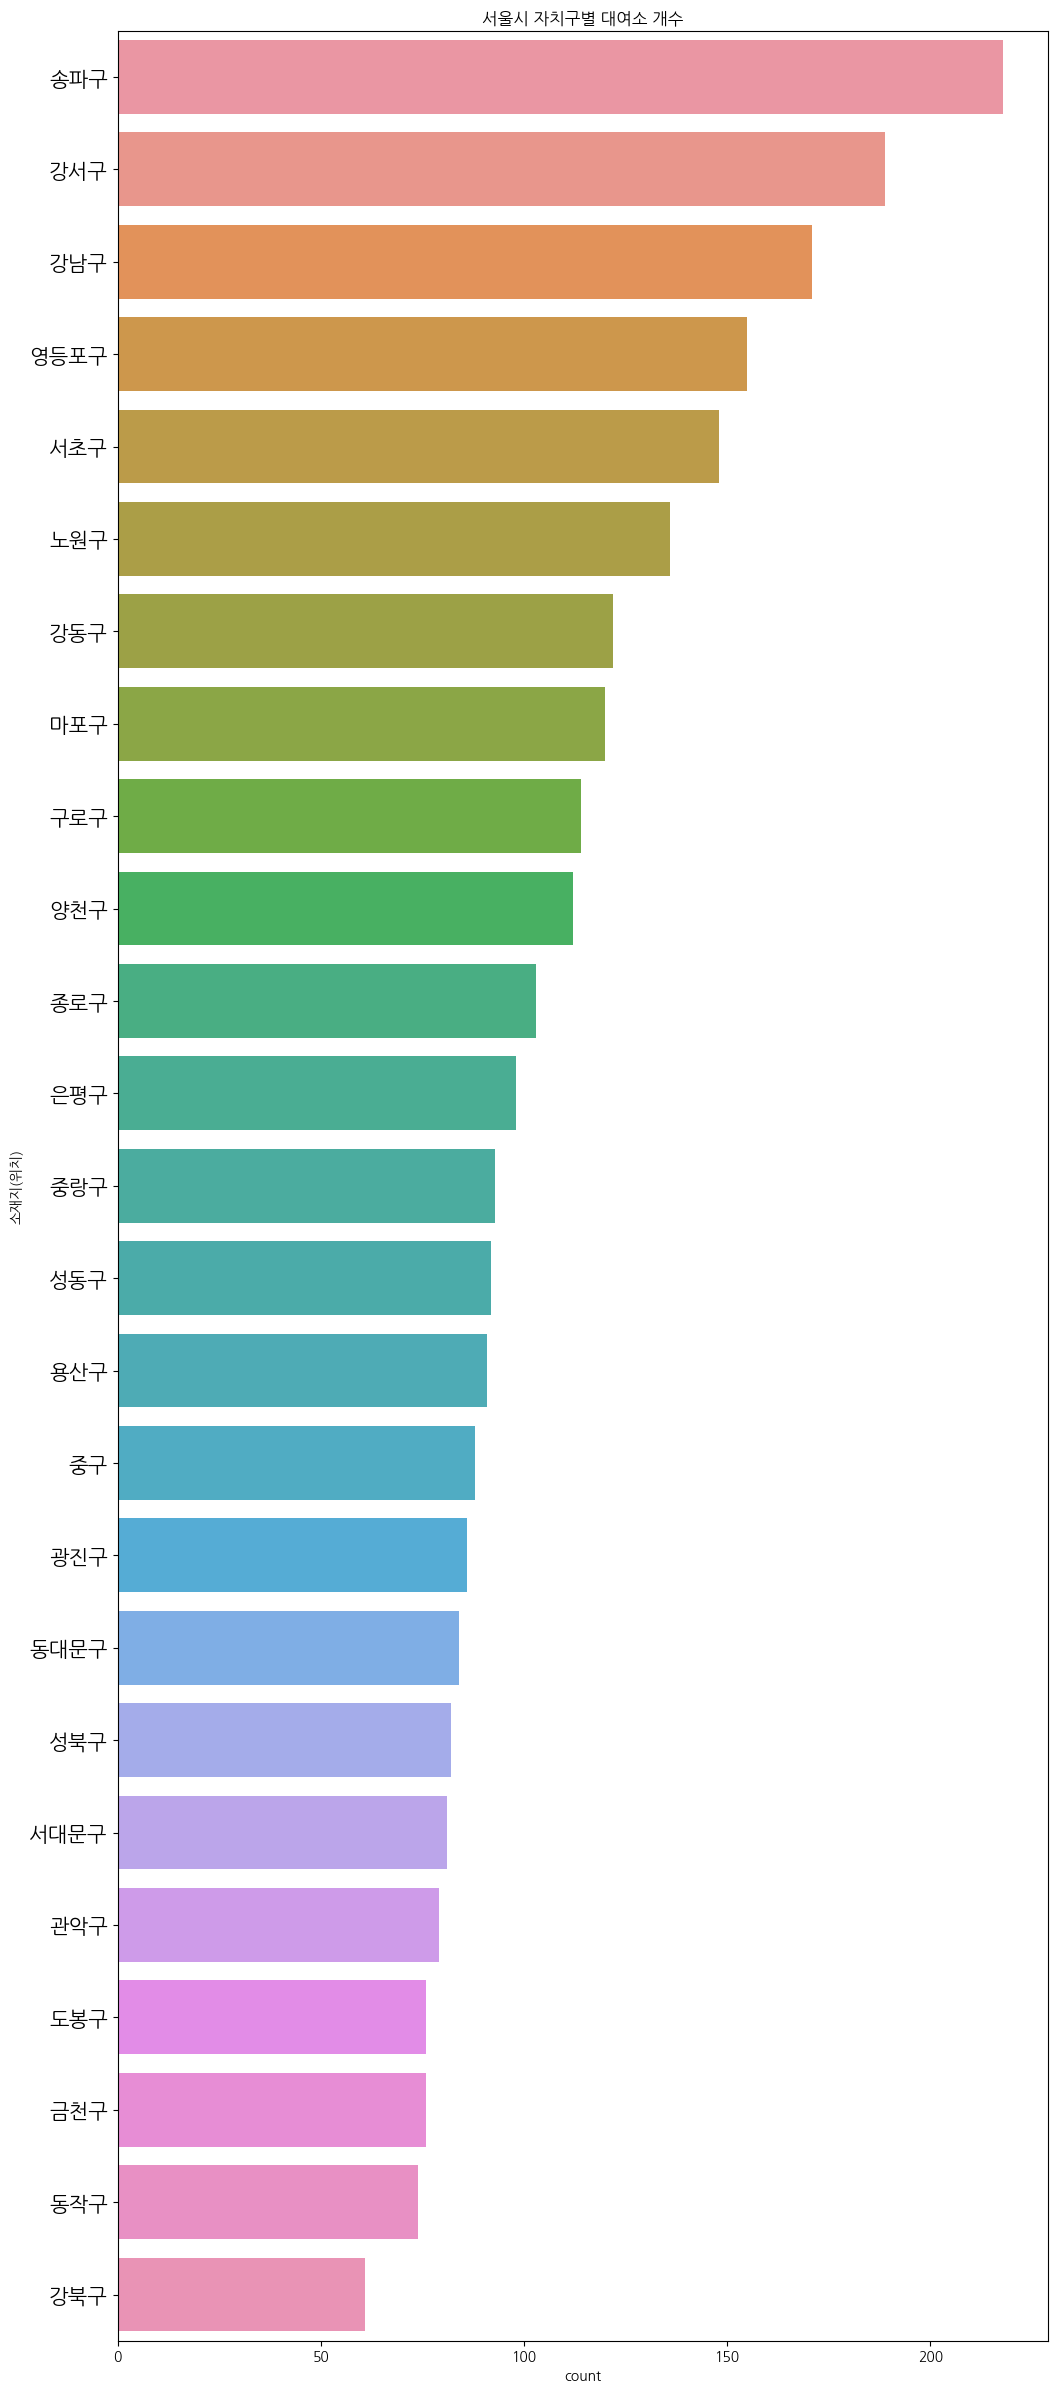

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 30))
sns.countplot(y=bikedata['소재지(위치)'], order=bikedata['소재지(위치)'].value_counts().index) # 어떤 칼럼의 데이터를, 어떤 순서로 지정할 것인지 나타냄
plt.yticks(fontsize=15) # y 축의 라벨의 크기를 나타냄.
plt.title('서울시 자치구별 대여소 개수') # 도표 제목을 나타냄
plt.show()

 행정구별 따릉이 대여소의 개수는 송파구가 가장 많으며 200개 이상이 있음. 다음으로, 강서구 강남구 순으로 많음. 반면 대여소가 가장 적었던 행정구는 강북구임. 그 외에 동작구, 금천구는 100 미만의 대여소를 가지고 있음.

In [53]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
# github에 게시된 서울시 행정구 json 파일을 request의 get method를 이용해 가져옴.
# 서버가 제공하는 데이터를 받아오는 것임. 
raw_seoul = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
raw_seoul_contents = raw_seoul.content # contents 메소드는 서버의 정보를 가져오는 방법 중 하나임. 이 외에도 text 메소드가 있음.
seoul_geo = json.loads(raw_seoul_contents)

이 지도 또한 folium을 이용해 아이콘 변경, popup, tooltip 외에 여러 요소를 추가할 수 있음. 설정은 앞서 만든 지도와 유사함

In [69]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=12, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(bikedata['위도'], bikedata['경도']):
    folium.Marker([lat, long], popup= "<a href='https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do' target=_'blik'>https://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do</a>", tooltip='If you want to know extra infomation, click me! <br>Also, you can check the location of rental office by clicking nearby feature', icon=folium.Icon(
        color='white',
        icon_color='green',
        icon='glyphicon glyphicon-phone-alt', 
        # googledp glyphicon 원하는 아이콘을 삽입할 수 있음.
        prefix='glyphicon')).add_to(marker_cluster)

m.add_child(folium.LatLngPopup()) 
m

In [70]:
m.save('map_SeoulBike.html')

단계구분도 제작을 위해, 같은 행정구에 존재하는 따릉이 대여소 데이터를 각각 묶어줌.

In [55]:
new_seoul_bike_group = bikedata.groupby('소재지(위치)')['소재지(위치)'].count()
new_seoul_bike_group.head

<bound method NDFrame.head of 소재지(위치)
강남구     171
강동구     122
강북구      61
강서구     189
관악구      79
광진구      86
구로구     114
금천구      76
노원구     136
도봉구      76
동대문구     84
동작구      74
마포구     120
서대문구     81
서초구     148
성동구      92
성북구      82
송파구     218
양천구     112
영등포구    155
용산구      91
은평구      98
종로구     103
중구       88
중랑구      93
Name: 소재지(위치), dtype: int64>

In [56]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

folium.Choropleth(
    geo_data = seoul_geo,
    data=new_seoul_bike_group, # 사용할 DataFrame 을 적어줌.
    columns=['소재지(위치)'], # DataFrame의 어떤 columns을 넣을지 적어줌.
    key_on='feature.properties.name', 
    #이 key_on이 매우 중요함. 서울시 json의 속성값과 따릉이 자전거의 속성 데이터 중에 동일하게 공유하는 key 값이 있어야 함.(folium의 정해진 형식)
    # 여기서는 양쪽의 데이터가 모두 '행정구'를 공유하고 있으므로 feature.properties.name을 적어줘야 함.
    # seoul_geo json 파일을 살펴보면 feature -> properties -> name 안에 행정구가 적혀 있음.
    fill_color='YlOrRd',
    # 단계구분도의 색상을 정해준다. 
    fill_opacity=0.5, # 색 투명도. 값이 높을수록 불투명해지며, 낮을수록 투명해짐. 이것을 조절해서 가독성을 높일 수 있음
    line_opacity=0.8, # 선 투명도
    legend_name='The number of 따릉이' # 범례의 이름을 지정해줌.
).add_to(m)
m

송파구와 강서구가 가장 자전거 대여소가 많고, 따라서 색깔이 가장 진한 red를 띄고 있음. 반면 동작구와 동작구는 가장 밝은 yellow를 띄고 있음. 한편 단순히 개수가 아니라 분위수를 활용하여 단계 구분도를 만들 수 있음.

In [57]:
# 분위수를 활용하여 단계 구분도도 만들 수 있음.
# 여기서는 4분위로 설정함.
bins = list(new_seoul_bike_group.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

folium.Choropleth(
    geo_data = seoul_geo,
    data=new_seoul_bike_group, 
    columns=['소재지(위치)'],
    key_on='feature.properties.name', 
    fill_color='YlOrRd',
    fill_opacity=0.4, 
    line_opacity=0.5, 
    legend_name= 'The number of 따릉이', # 범례
    bins=bins # bins 를 지정해줌에 따라 분위수를 설정할 수 있음
).add_to(m)
m

개수를 기준으로 만든 단계구분도와 분위수를 이용하여 만든 단계 구분도 사이에서는 분포 패턴의 차이가 있음을 알 수 있음.
<br> 이런식으로 배경 지도에 서울시 행정구별 속성값 단계구분도를 overlay 할 수 있음


In [58]:
m.save('map_SeoulBike_Choropleth.html')

#### 5-(6) 추출한 데이터와 Method를 활용한 Class 제작

지금까지 학원, 자전거 대여소 csv 파일을 다루었음. 이를 대상으로 지오코딩 함수와 역지오코딩 함수를 추가한 새로운 class를 만들고자 함.
<br> 자전거 대여소와 학원의 공통점은 위도, 경도, 도로명주소를 가질 수 있다는 점임. 따라서 base class는 지리적 객체로 설정함. 또한 지리적 객체 class에 지오코딩, 역지오코딩를 비롯한 여러 함수를 정의해보았음. 

In [59]:
from geopy.geocoders import Nominatim
# geopy.geocdoers의 모듈에서 Nominatiom method를 호출한다. geopy는 python library 중 하나임.

geolocal = Nominatim(user_agent = 'South Korea', timeout=None)
# user_agent는 지오코딩을 실시하는 지역을 나타낸다. 만약 지오코딩하는 지역이 South korea가 아니라면 다른 parameter를 사용해야함.


class GeoFeature :

    # GeoFeature의 객체 개수를 count하기 위한 변수임. 
    CountGeo = 0

    def __init__(self, info_long, info_lat) :

        # 대한민국의 좌표는 경도 124도와 132도 사이, 위도 33도와 43도임. 
        # 따라서 해당 범위 밖의 좌표를 받으면 'Null' 값으로 지정함. 
        # 해당 범위 내에 있으면 str로 각각 저장함.
        
        if ( 124 <= float(info_long) ) and ( float(info_long) <= 132 ) :
            self.longitude = info_long
        else:
            self.longitude = 'Null'

        if ( 33 <= float(info_lat) ) and ( float(info_lat) <= 43 ) :
            self.latitude = info_lat
        else:
            self.latitude= 'Null'
        
        self.Address = 'Null'
        GeoFeature.CountGeo = GeoFeature.CountGeo+1 # 클래스 변수의 값을 생성자를 호출할 때마다 1씩 증가함.

    def Geocoding_single(self):
        """ (Address string) -> [longitude_str, latitude_str] 
    
    Geocoding 함수는 입력값으로 주소(도로명 또는 구 주소)를 받고 위경도 좌표를 반환하는 함수임
    Input parameter는 주소 string이며 지도 상에 표시된 완전한 주소를 전달해야 함.
    Output인 위경도는 list type임. 위경도는 각각 str이며 str을 element로 가지는 list임.
    주소를 변환하는 과정에서 잘못된 주소값을 전달할 수 있기 때문에 try, except 문법을 추가함.
    에러가 나더라도, 프로그램이 멈추지 않고 [0,0]의 return 값을 전달할 수 있도록 함. 이는 대용량의 데이터 변환에서 필수적인 요소임.
    >>> Geocoding_single("서울특별시 동대문구 경희대로 26")
     ['37.594986500000005' , '127.05490968993911']
    """
        if self.Address == 'Null' :
            return False, "Address is not given"
        
        else:

            try:
                geo = geolocal.geocode(self.Address)
                crd = [ geo.longitude, geo.latitude ]
                #Geocoding_single을 실시한다는 것은 주소는 있지만 위경도 값을 가지지 않은 객체를 전제로함
                #따라서 위경도값이 [경도, 위도]리스트로 나오면, 각각 self.longitude와 self.latitude에 저장함
                self.longitude =  str(crd[0])
                self.latitude = str(crd[1])
                return crd
    
            except:
                return False, [0,0]

    def Geocoding_reverse_single(self): 
        """ (longitude and latitude string) -> ('geopy.location.Location')
    
    Geocoding_reverse 함수는 입력값으로 위경도를 받고 주소를 반환하는 함수임
    이때 위경도는 하나의 string 이며 'lat , long' 형식으로 입력해야 함. 반환된 주소는 data type은 location임.
    이때 잘못된 위경도 값(user_agent에 해당하지 않는 위경도)을 전달할 수 있기 때문에 try, except 문법을 추가함.
    >>> Geocoding_reverse("37.2395581, 127.0834937")
    경희대학교 국제캠퍼스, 1732, 덕영대로, 하갈동, 기흥구, 용인시, 경기도, 17104, 대한민국
     
        """
        if ( self.longitude == 'Null' ) or ( self.latitude == "Null" ) :
            return False, "Long and Lat is not given"
        else:
            try:
                address = geolocal.reverse( self.latitude+  ', ' + self.longitude )
                # Geocoding_reverse_single을 실시하다는 것은 위경도 좌표값은 있지만 주소값을 없는 객체를 전제로 함
                # 따라서 결과물인 address를 str type으로 변환한 뒤 self.Address에 저장함.
                self.Address = str(address)
                return self.Address
            except:
                return False, "404 not Found"
        
    def CheckLongLat(self):
        # 위도 경도의 값을 검사해 Null의 존재 유무를 알 수 있도록 함.
        if (self.longitude =='Null' ) or (self.latitude == 'Null'):
            return False, self.longitude, self.latitude
        else:
            return True, self.longitude, self.latitude
        
    def __str__(self):
        return "Longitude : {} \nLatitude : {} \nAddress : {}".format(self.longitude, self.latitude, self.Address)
    
    def getNumOfGeo(self):
        # class의 instance를 확인 할 수 있는 함수임.
        return GeoFeature.CountGeo
    
class BikeRental(GeoFeature):
    
    def __init__(self, info_long, info_lat, id, type):
        super().__init__(info_long, info_lat)
        self.id = id # 따릉이 대여소 번호 ex) 301
        self.type = type # 따릉이 대여 방식 ex) QR or LCD

    def __str__(self):
        res = super().__str__()
        return "It's Bikerental!\n{}\nID : {}\nType : {}".format(res, self.id, self.type)

class Academic(GeoFeature):

    def __init__(self, info_long, info_lat, name, subject):
        super().__init__(info_long, info_lat)
        self.name = name # 학원명을 나타냄
        self.subject = subject # 학원의 학습 분야를 나타냄. ex) 대입, 회계, 예체능

    def __str__(self):
        res = super().__str__()
        return "It's Academy!\n{}\nNAME : {}\nSubject : {}".format(res, self.name, self.subject)

직접 지오코딩과 역지오코딩 함수를 넣어서 클래스를 만듬. <br>정상적으로 돌아가는지 확인하기 앞서, 두 가지 조건을 제시함.
<br> 1. 지오코딩을 실시한다는 것은 위경도 값은 모르고 주소를 안다는 것임. 따라서 Academic 클래스의 객체 a는 위경도 좌표가 없음을 가정함. 그렇기 때문에 일부러 out of range 위도, 경도값을 주어 Null 값을 가지도록 함. 이후 지오코딩을 통해 얻은 위경도 값을 a 내부 위경도 값으로 업데이트 할 수 있도록 코드를 설계함.
<br> 2. 역지오코딩을 실시한다는 것은 위경도 값은 알지만 주소를 모른다는 것임. 따라서 BikeRental의 객체 b는 위경도 좌표만 있고 도로명 주소가 없음을 가정함. b도 마찬가지로 역지오코딩을 통해 얻은 주소를 b의 내부적으로 저장하는 주소값에 부여하도록 코드를 설계함.

In [60]:
# import GeoModule
# import importlib
# importlib.reload(GeoModule)

# 학원은 현재 도로명 주소만 있음. 위경도 없음.
# 자전거 대여소는 현재 위경도만 있음. 도로명주소가 없음.
a=Academic('11.0834937', '3777777.2395581', '강민 수학','예능(대)')
b=BikeRental('127.0834937', '37.2395581', 301, 'QR')
a.Address ="서울특별시 동대문구 경희대로 26 "
print("Before", "--------------------------------------------------------")
print("a")
print(a)
print()
print("b")
print(b)
print()
print("After", "--------------------------------------------------------")
a.Geocoding_single()
b.Geocoding_reverse_single()
print("a")
print(a)
print()
print("b")
print(b)


Before --------------------------------------------------------
a
It's Academy!
Longitude : Null 
Latitude : Null 
Address : 서울특별시 동대문구 경희대로 26 
NAME : 강민 수학
Subject : 예능(대)

b
It's Bikerental!
Longitude : 127.0834937 
Latitude : 37.2395581 
Address : Null
ID : 301
Type : QR

After --------------------------------------------------------
a
It's Academy!
Longitude : 127.05490968993911 
Latitude : 37.594986500000005 
Address : 서울특별시 동대문구 경희대로 26 
NAME : 강민 수학
Subject : 예능(대)

b
It's Bikerental!
Longitude : 127.0834937 
Latitude : 37.2395581 
Address : 전자정보대학, 1732, 덕영대로, 하갈동, 기흥구, 용인시, 경기도, 17104, 대한민국
ID : 301
Type : QR


__str__ 함수를 통해 종합적으로 살펴봄. Before와 After 사이에 위도, 경도, 주소값이 Null이었지만, 함수 실행 결과 모두 새로운 데이터를 받은 것을 볼 수 있음. 지오코딩, 역지오코딩을 이용해 위경도 또는 주소값을 갱신할 수 있는 class임. 이것으로 데이터 분석 과정을 마무리하고자 함.

### (6) 결론과 한계점

분석 과정에서 인상 깊었던 점은 Python을 통해 주로 excel에서만 진행할 수 있었던 데이터 전처리를 훨씬 빠르고 효율적으로 처리할 수 있었다는 것임. 즉, python 내에서 pandas와 칼럼 추출 코드 일부만 숙지하면 누구나 손쉽게 데이터 전처리를 진행할 수 있음. 또한 Python 내의 geopy, folium 등 다양한 라이브러리를 통해 공간분석 기법을 구현할 수 있었고, 오히려 GIS 보다 진행 속도가 빠른 것 같다는 느낌을 받았음. Python은 오픈 소스인 만큼 수많은 라이브러리를 지원함. 따라서 향후 공간분석 시에 GIS 프로그램과 코딩을 적절히 활용한다면 상당한 시너지 효과가 기대됨.

<br>단일 객체에 대한 지오코딩은 1초도 걸리지 않음. 그러나 대용량의 csv, excel로 진행 시 적지 않은 시간이 소요됨을 파악할 수 있었음. 즉, geopy 라이브러리는 지오코딩의 개수 제한이 없지만 데이터가 늘어남에 따라 시간 복잡도가 증가함. 타 지오코딩 툴(예로 biz 지오코딩 툴)은 10,000개 미만에 대해서는 5분이 안되는 지오코딩의 속도를 보이지만 일일 변환 개수 제한(10,000)이 존재함. 따라서 이를 보완하기 위해 Geopy 라이브러리의 진행속도를 높일 수 있는 연구가 필요해 보임. (그러나 분석에서 사용한 kakao api나 google의 지오코딩 코드 또한 개수가 늘어나면 더 많은 시간이 소요되는 점과 일일 변환 개수가 존재한다는 점에서는 geopy의 매리트가 여전히 존재함.)

### (7) 참고문헌

1.『모두의 데이터 분석 with 파이썬, 송석리,이현아, 길벗
<br>2. https://wonhwa.tistory.com/29
<br> 3. https://velog.io/@s0young/Troubleshooting-GeoPy%EC%9D%98-geocoding-%EC%B2%98%EB%A6%AC-%EC%86%8D%EB%8F%84%EB%8A%94-%EC%99%9C-%EB%8A%90%EB%A6%B4%EA%B9%8C
<br> 4. https://parkgihyeon.github.io/project/geocoding-api/

### (10) --- (3),(4) 과정에서 나만의 코드
#### <br>전체 코드중에서 나만의 단순히 코드를 분리하고 나열한 것임. 따라서 실행되지 않음. 이 코드들은 (5) 분석과정에 포함되어 있음.  

#### -지오코딩과 역지오코딩 내의 try except 문법구문만(내부 요소는 활용)

In [ ]:
try:
        geo = geolocal.geocode(address)
        crd = [geo.latitude, geo.longitude]
        return crd
    
    except:
        return [0,0]

In [ ]:
try:
        address = geolocal.reverse(lat_lng_str)
        return address
    except:
        return "404 not Found"


#### -동대문구 학원 데이터의 전처리와 값 수정과정에서 사용한 코드들

In [ ]:
# csv 파일을 읽기 위해 pandas를 import 해줌.
import pandas as pd

# 전처리 전의 data이므로, raw라는 이름으로 csv 파일을 read함.
Dongdaemun_raw = pd.read_csv('C:\\Users\\xxoex\\Downloads\\서울시 동대문구 학원 교습소정보_Raw.csv', encoding='cp949')

# 서울시 동대문구 학원 교습소정보_Raw.csv에서 필요한 칼럼만 추출하여 저장
# 지오코딩을 위해 도로명 주소만 따로 추출함.
# Name: 도로명주소, Length: 672, dtype: object, data의 총 개수는 672개 라는 것을 알 수 있음. 
# 이 672개의 도로명주소를 지오코딩하여, '위도', '경도' 라는 칼럼을 추가해 위경도 좌표를 추가할 것임.
Geocoding_address = Dongdaemun_raw['도로명주소']
print(Geocoding_address)

# 대용량 데이터를 지오코딩 할 때 약간의 시간이 소요됨.
# 지오코딩이 어느정도 진행되었는지 시각적으로 표현할 수 있는 library임.
!pip install tqdm

# lat은 위도, long은 경도이므로, 새로운 data에 필요한 칼럼들(위도, 경도 포함)을 모두 추가해서 따로 저장함.
Final_Dongdaemun_data = pd.DataFrame({'행정구역': Dongdaemun_raw['행정구역명'],
                                      '학원이름' : Dongdaemun_raw['학원명'],
                                      '주소':Geocoding_address,
                                      '상세주소':Dongdaemun_raw['도로명상세주소'],
                                      '위도':lat,'경도':long,'분야명':Dongdaemun_raw['분야명']})

# index 65, 517번째의 위도, 경도는 모두 0이고, 먼저 65 번째 data의 위경도를 수정해줌

Final_Dongdaemun_data.loc[65, '위도'] = Add_lat_long[0]
Final_Dongdaemun_data.loc[65, '경도'] = Add_lat_long[1]

# 517 번째 data의 위경도를 수정해줌

Final_Dongdaemun_data.loc[517, '위도'] = Add_lat_long[0]
Final_Dongdaemun_data.loc[517, '경도'] = Add_lat_long[1]

# 위도, 경도 값이 0인 객체가 없는 것을 확인함
print(Final_Dongdaemun_data[Final_Dongdaemun_data['위도']==0])
print(Final_Dongdaemun_data[Final_Dongdaemun_data['경도']==0])

# Dataframe 작업물을 csv로 저장해줌.
Final_Dongdaemun_data.to_csv('Dongdaemun_educational_Institute.csv')
import pandas as pd
mapdata = pd.read_csv('Dongdaemun_Educational_Institute.csv')
mapdata

#### -서울시 따릉이 대여소 전처리와 지도화 과정에서의 코드

In [ ]:
import requests, json
Dongdaemungeo = json.load(open('dongdaemun.json', encoding='utf8'))


# folium library를 설치한다.
! pip install folium
import folium 

raw_seoul_bike = pd.read_csv('공자전거 대여소 정보(23.06월 기준) (1).csv', encoding = 'cp949')
# 인코딩을 cp949로 변경해줘야함. 설정하지 않으면 한글이 깨짐.
# 필요한 컬럼 정보만 가져옴

# 데이터 전처리를 실시해줌. 한번에 여러 행을 제거해야 하기 때문에 리스트로 행을 넣도록 함.
new_seoul_bike = raw_seoul_bike.drop([0, 1, 2, 3]) 
new_seoul_bike

# 의미가 없는 데이터는 칼럼(열)을 지워, 데이터 전처리를 진행함.
new_seoul_bike = new_seoul_bike.drop(['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1)

# 칼럼명을 새롭게 지정함. 
new_seoul_bike.rename(columns = {'Unnamed: 3':'도로명주소','Unnamed: 4':'위도', 'Unnamed: 5': '경도', 'Unnamed: 8': '설치형태2'}, inplace=True)
new_seoul_bike

# 작업한 데이터를 csv로 저장함
new_seoul_bike.to_csv('Seoul_Bike_rental.office.csv')

import pandas as pd
bikedata = pd.read_csv('Seoul_Bike_rental.office.csv')
bikedata

#### -이 외에 folium library 의 tooltip, icon, popup, key on 관련 코드와 encoding 변경 코드, 

In [ ]:
popup= "<a href='https://data.seoul.go.kr/dataList/OA-20535/S/1/datasetView.do' target=_'blik'>https://data.seoul.go.kr/dataList/OA-20535/S/1/datasetView.do</a>", tooltip='If you want to know extra infomation, click me. <br>Also, you can check the location by clicking nearby feature', icon=folium.Icon(
        color='white',
        icon_color='black',
        icon='glyphicon glyphicon-pencil', # googledp glyphicon 원하는 아이콘을 삽입할 수 있음.
        prefix='glyphicon')).add_to(marker_cluster)

In [ ]:
raw_seoul_bike = pd.read_csv('공자전거 대여소 정보(23.06월 기준) (1).csv', encoding = 'cp949')
# 인코딩을 cp949로 변경해줘야함. 설정하지 않으면 한글이 깨짐.
# 필요한 컬럼 정보만 가져옴

#### - (5)- 6 단계의 클래스 구현 대부분의 코드 중 지오코딩 함수와 역지오코딩 함수를 정의하는데 사용한 코드를 제외한 모든 코드.(지오코딩과 역지오코딩 함수 일부는 활용함. 그러나 함수에도 input parameter를 변경하거나 return 값을 self 정보를 갱신하는 등 나만의 코드를 추가하였음)